# 决策树

## 概述

### 决策树是如何工作的

|决策树|非参数|有监督|
|:--|:--|:--|
|树状|自己总结决策规则|数据有标签|


适用于各种数据，在解决各种分类问题上表现良好。是各种树模型集成算法的基础。

**工作原理：**
本质上是一种图结构，只需要做一系列问答就能够对数据进行分类了。


## 构建决策树实例

### 导入算法库和模块

In [33]:
import pandas as pd
import numpy as np

In [34]:
from sklearn import tree    #导入决策树模型
from sklearn.datasets import  load_wine    #导入白酒数据集
from sklearn.model_selection import train_test_split   # 导入数据划分模块

In [35]:
#设置全部行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [36]:
a =1
b = 2
a
b

1

2

### 获取数据

用sklearn自带的红酒数据集

### 探索数据

In [37]:
wine = load_wine()
[*pd.Series(wine.target).unique()]

[0, 1, 2]

In [38]:
df_1 = pd.DataFrame(np.arange(50).reshape(5,-1))
df_2 = df_1.copy()
df_1
df_2

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9
1,10,11,12,13,14,15,16,17,18,19
2,20,21,22,23,24,25,26,27,28,29
3,30,31,32,33,34,35,36,37,38,39
4,40,41,42,43,44,45,46,47,48,49


,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9
1,10,11,12,13,14,15,16,17,18,19
2,20,21,22,23,24,25,26,27,28,29
3,30,31,32,33,34,35,36,37,38,39
4,40,41,42,43,44,45,46,47,48,49


In [39]:
pd.concat([df_1,df_2],axis = 1)

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9
1,10,11,12,13,14,15,16,17,18,19,10,11,12,13,14,15,16,17,18,19
2,20,21,22,23,24,25,26,27,28,29,20,21,22,23,24,25,26,27,28,29
3,30,31,32,33,34,35,36,37,38,39,30,31,32,33,34,35,36,37,38,39
4,40,41,42,43,44,45,46,47,48,49,40,41,42,43,44,45,46,47,48,49


In [40]:
wine = load_wine()   #获取数据    是一个二维数组，存储着酒的各种属性

wine.data.shape    #查看数据表形状（维度、行、列）

wine.target       #标签信息
[*pd.Series(wine.target).unique()]     

#如果wine是一张表，应该是数据在前，标签列拼接在最后一列

pd.concat([pd.DataFrame(wine.data),
           pd.DataFrame(wine.target)],axis = 1).head()

wine.feature_names
wine.target_names

(178, 13)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

[0, 1, 2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 划分训练集和测试集

In [41]:
[*wine.target_names]

['class_0', 'class_1', 'class_2']

In [42]:
Xtrain ,Xtest , Ytrain , Ytest = \
train_test_split(wine.data,wine.target,
                 test_size = 0.3)

Xtrain.shape
Xtest.shape

(124, 13)

(54, 13)

### 构建模型

In [43]:
tree.DecisionTreeClassifier(criterion="entropy")

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)

score

0.8888888888888888

### 构建决策树

In [45]:
[*wine.feature_names]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [46]:
import os

In [48]:
import os

#os.environ("PATH") += os.pathsep + "C:\Program Files (x86)\Graphviz2.38\bin"

In [49]:
[*wine.feature_names]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [50]:
[*pd.Series(wine.target).unique()]

[0, 1, 2]

['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜\\色强度', '色调', 'od280/od315稀释葡萄酒', '脯氨酸']


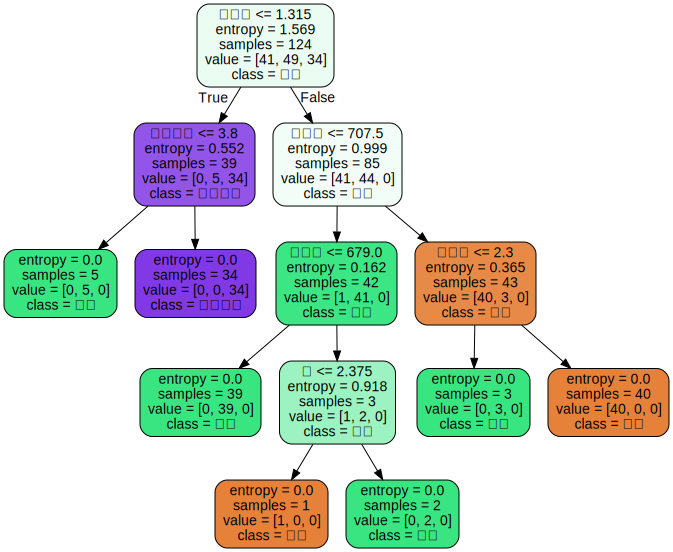

In [51]:
# 修改列名
#feature_name =[*wine.feature_names]
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜\色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

print(feature_name)

import graphviz

dot_data = tree.export_graphviz(clf
                                ,out_file=None
                                ,feature_names=feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled = True
                                ,rounded = True
                               )

graph = graphviz.Source(dot_data)
graph

In [52]:
dot_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)

In [53]:
graph.render("tree_01")

'tree_01.pdf'

In [54]:
#查看特征重要程度

clf.feature_importances_

# 第一种方法，用多维数组的格式查看变量的重要程度
[*zip(feature_name,clf.feature_importances_)]

#第二种方法，使用dataframe并排序，查看变量重要性
feature_importance = pd.DataFrame([*zip(feature_name,clf.feature_importances_)],columns=["feature","feature_importances"])
feature_importance.sort_values(by = "feature_importances",ascending=False)[:8]

array([0.        , 0.        , 0.01415913, 0.        , 0.        ,
       0.        , 0.53345675, 0.        , 0.        , 0.11074539,
       0.        , 0.        , 0.34163872])

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.014159127458210886),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.5334567540029477),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜\\色强度', 0.1107453936929764),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.34163872484586505)]

,feature,feature_importances
6,类黄酮,0.533457
12,脯氨酸,0.341639
9,颜\色强度,0.110745
2,灰,0.014159
0,酒精,0.000000
1,苹果酸,0.000000
3,灰的碱性,0.000000
4,镁,0.000000


我们已经在只了解一个参数的情况下，建立了一棵完整的决策树。但是回到步骤1.2.5建立模型，score会在某个值附近波动，引起步骤1.2.6中画出来的每一棵树都不一样。它为什么会不稳定呢？如果使用其他数据集，它还会不稳定吗？

我们之前提到过，无论决策树模型如何进化，在分枝上的本质都还是追求某个不纯度相关的指标的优化，而正如我们提到的，不纯度是基于节点来计算的，也就是说，决策树在建树时，是靠优化节点来追求一棵优化的树，但最优的节点能够保证最优的树吗？集成算法被用来解决这个题：sklearn表示，既然一棵树不能保证最优，那就建更多的不同的树，然后从中取最好的。怎样从一组数据集中建不同的树？在每次分枝时，不从使用全部特征，而是随机选出一部分特征，从中选取出不纯度相关指标最优的作为分支用的节点。这样，每次生成的树都会不同。

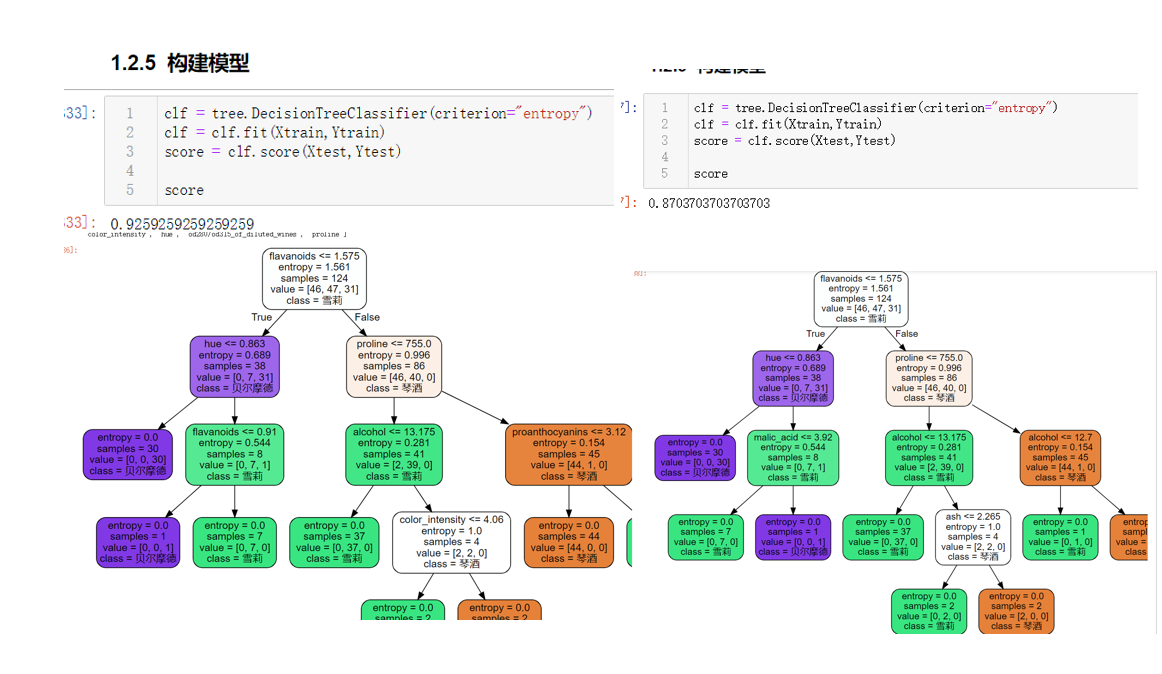

#### random_state参数

In [55]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=23)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)

score

0.9259259259259259

#### splitter参数

In [56]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=43
                                  ,splitter="random"
                                 )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)

score

0.8703703703703703

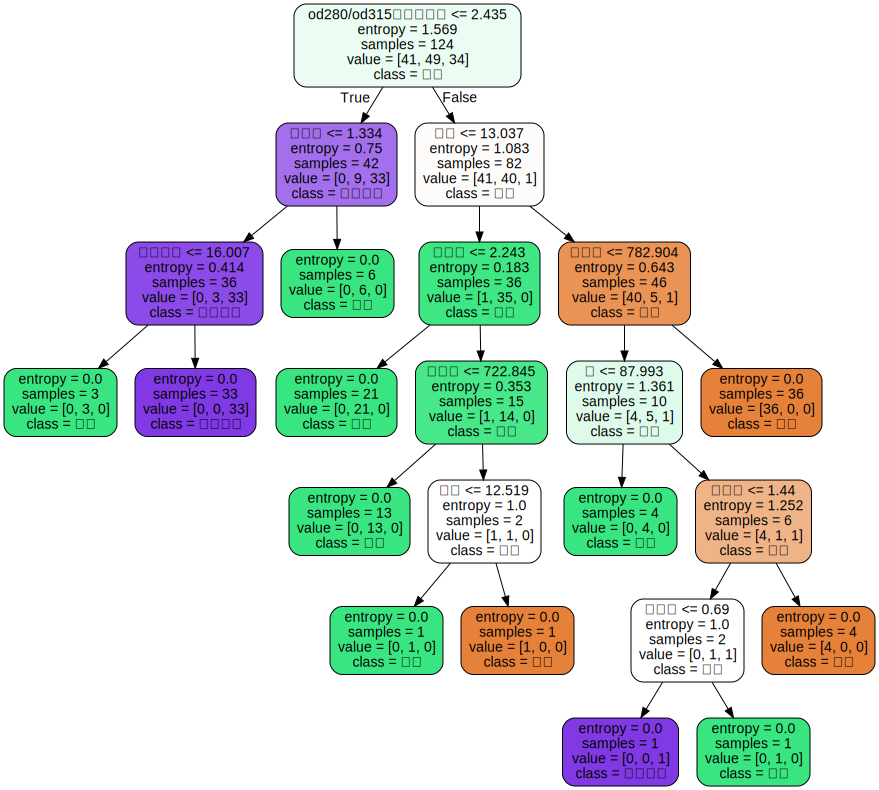

In [57]:
import graphviz
dot_data = tree.export_graphviz(clf,out_file=None
                                ,feature_names=feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled = True
                                ,rounded = True
                               )

graph = graphviz.Source(dot_data)
graph

#### 剪枝参数

##### max_depth

限制最大深度，超出设定深度的树枝会全部砍掉

##### min_samples_left  & min_samples_split

min_samples_left，限制一个节点在分支之后叶节点的叶子数量来剪枝，当分之后叶节点数量不足时就不会分支

min_samples_split， 限制分枝之后的样本数量来剪枝，当分枝后训练样本不足就不会分枝

min_samples_left一般搭配max_depth使用

In [58]:
?tree.DecisionTreeClassifier()

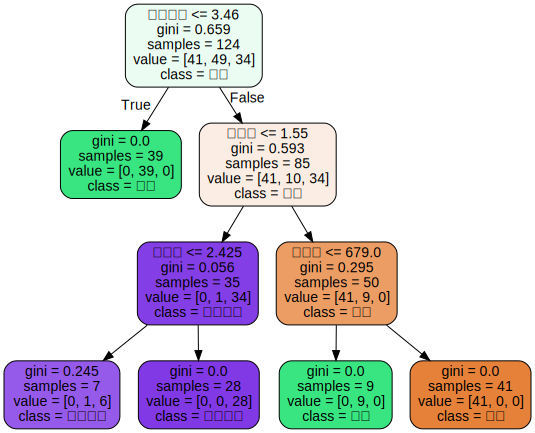

0.9919354838709677

0.9444444444444444

In [59]:
clf = tree.DecisionTreeClassifier(criterion="gini"
                                  ,random_state=33
                                  ,splitter="best"
                                  ,max_depth=3
                                  ,min_samples_leaf=7
                                  ,min_samples_split=4
                                  )

clf = clf.fit(Xtrain, Ytrain)

import graphviz
dot_data = tree.export_graphviz(clf,out_file=None
                                ,feature_names=feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled = True
                                ,rounded = True
                               )

graph = graphviz.Source(dot_data)
graph

clf.score(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

##### max_features & min_impurity_decrease

<Figure size 640x480 with 1 Axes>

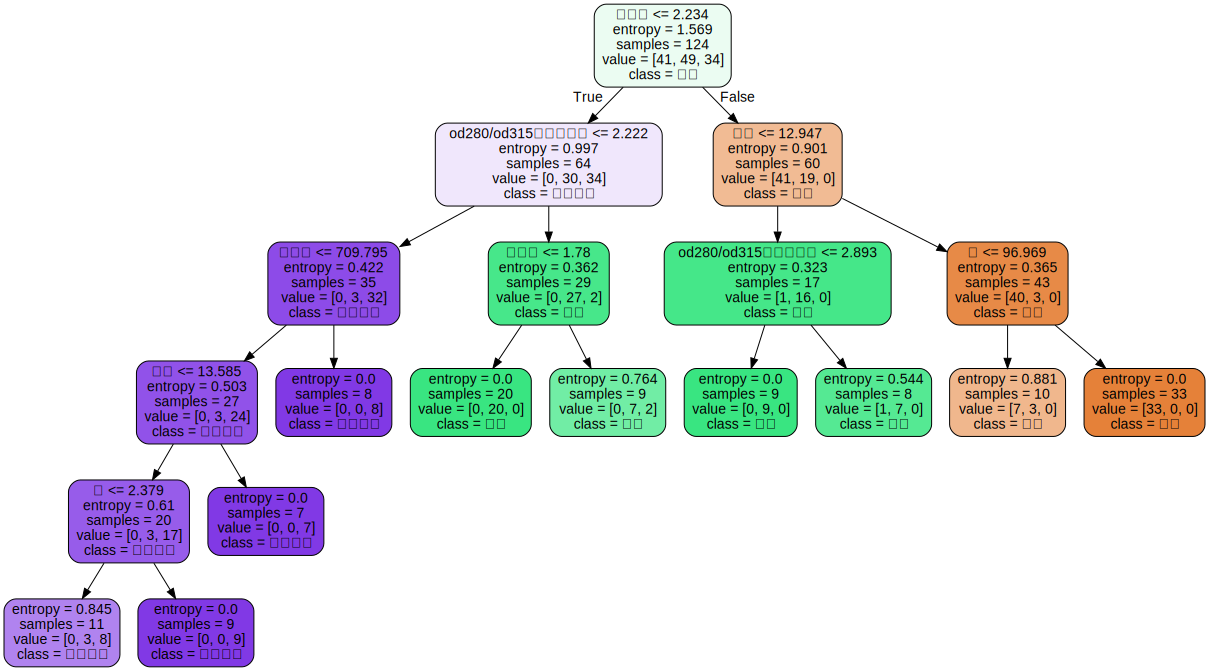

In [60]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i +1
                                      ,criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
                                      ,min_impurity_decrease = 0
                                      ,min_samples_leaf=7
                                      ,min_samples_split=4
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
    
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

import graphviz
dot_data = tree.export_graphviz(clf,out_file=None
                                ,feature_names=feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled = True
                                ,rounded = True
                               )

graph = graphviz.Source(dot_data)
graph

### 目标权重参数

#### class_weight & min_weight_fraction_leaf

# 实例：泰坦尼克号幸存者的预测

## 准备工作

### 导入所需的库和模块

In [61]:
a = [1,2,3,4]
b = [2,4,5,6]
c = [3,4,5,6]

In [62]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV   #网格搜索    
from sklearn.model_selection import cross_val_score   #交叉验证的
import matplotlib.pyplot as plt  #可视化
%matplotlib inline

### 导入数据

In [63]:
%pwd

'C:\\Users\\Administrator\\PycharmProjects\\classpy'

In [64]:
data = pd.read_csv("train.csv")
data.head()
data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 数据预处理

In [65]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [66]:
[*data["Embarked"].unique()].index("S")

0

In [67]:
data = pd.read_csv("train.csv")
data.head()
data.info()

#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法

data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

#将分类变量转换为数值型变量

#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"]== "male").astype("int")

#将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

#查看处理后的数据集
data.head()

data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int32
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null int64
dtypes: float64(2), int32(1), int64(6)
memory usage: 66.0 KB


### 提取标签和特征矩阵，分测试集和训练集

In [68]:
data.columns    # features_name

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [71]:
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

#data = pd.concat([X,y],axis = 1)
#data[:5]
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

    
#查看分好的训练集和测试集
Xtrain.head()
data.shape
Xtrain.shape

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,744,3,1,24.000000,1,0,16.1000,0
1,138,1,1,37.000000,1,0,53.1000,0
2,187,3,0,29.699118,1,0,15.5000,2
3,58,3,1,28.500000,0,0,7.2292,1
4,212,2,0,35.000000,0,0,21.0000,0


(889, 9)

(622, 8)

### 导入模型，第一次查看模型结果

In [72]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score_ = clf.score(Xtest,Ytest)

score_

score = cross_val_score(clf,X,y,cv=10).mean()   #交叉验证

score

0.7865168539325843

0.7469611848825333

## 调参

### max_depth

0.8166624106230849


([<matplotlib.axis.XTick at 0x9a22668>,
 <a list of 10 Text xticklabel objects>)

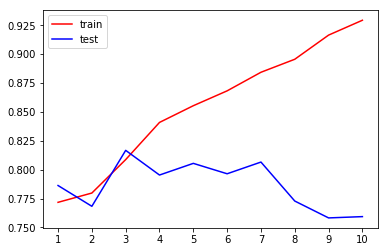

In [73]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth = i+1
                                ,criterion = "entropy"
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv = 10).mean()
    tr.append(score_tr)
    te.append(score_te)
    
print(max(te))
plt.plot(range(1,11),tr,color = "red",label = "train")
plt.plot(range(1,11),te,color = "blue",label = "test")
plt.xticks(range(1,11))
plt.legend()
plt.show()


#这里为什么使用“entropy”？
#因为我们注意到，在最大深度=3的时候，模型拟合不足，在训练集和测试集上的表现接近，但却都不是非常理想，只能够达到83%左右，所以我们要使用entropy。

### 网格搜索调参

In [79]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
                ,'criterion':("gini","entropy")
                #,"max_depth"=3
                #,'min_samples_leaf'=7
                ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
                #,"min_samples_split"=4
             }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GridSearchCV?
GS.fit(Xtrain,Ytrain)

GS.best_params_
GS.best_score_

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'splitter': ('best', 'random'), 'criterion': ('gini', 'entropy'), 'min_impurity_decrease': [0.0, 0.02631578947368421, 0.05263157894736842, 0.07894736842105263, 0.10526315789473684, 0.13157894736842105, 0.15789473684210525, 0.18421052631578946, 0.21052631578947367, 0.23684210526315788, 0.2631578947368421, 0.2894736842105263, 0.3157894736842105, 0.3421052631578947, 0.3684210526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526315, 0.47368421052631576, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_tra

{'criterion': 'entropy',
 'min_impurity_decrease': 0.02631578947368421,
 'splitter': 'best'}

0.7829581993569131

In [75]:
GS.fit(Xtest,Ytest)
GS.best_params_
GS.best_score_

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'splitter': ('best', 'random'), 'criterion': ('gini', 'entropy'), 'min_impurity_decrease': [0.0, 0.02631578947368421, 0.05263157894736842, 0.07894736842105263, 0.10526315789473684, 0.13157894736842105, 0.15789473684210525, 0.18421052631578946, 0.21052631578947367, 0.23684210526315788, 0.2631578947368421, 0.2894736842105263, 0.3157894736842105, 0.3421052631578947, 0.3684210526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526315, 0.47368421052631576, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_tra

{'criterion': 'gini',
 'min_impurity_decrease': 0.05263157894736842,
 'splitter': 'best'}

0.8202247191011236

In [76]:
feature_name = list(data.columns)
feature_name[1:9]

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

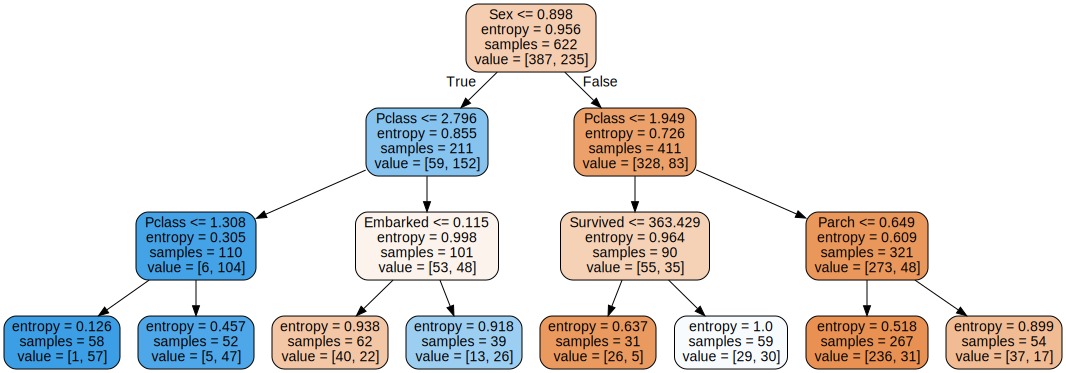

0.8022508038585209

0.8089887640449438

In [77]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=25
                                  ,splitter="random"
                                  ,max_depth=3
                                  ,min_samples_leaf=10
                                  ,min_samples_split=5
                                  ,min_impurity_decrease = 0
                                  )

clf = clf.fit(Xtrain, Ytrain)

import graphviz
dot_data = tree.export_graphviz(clf,out_file=None
                                ,feature_names = list(data.columns)[1:9]
                               # ,class_names=["0","1","2"]
                                ,filled = True
                                ,rounded = True
                               )

graph = graphviz.Source(dot_data)
graph


clf.score(Xtrain,Ytrain)
clf.score(Xtest,Ytest)